
# <font color="Blue">**[1일차 개요] 객체인식을 위한 이미지데이터 수집** <font>

### **[사전 준비 사항]**
* tutorial.mp4 파일을 본인 학습노트북에 다운로드해 주세요
* 구글드라이브에 아래와 같이 폴더를 생성해 주세요.
  - 구글드라이브 루트에 "helmet"이라는 폴더 생성
  - "helmet" 폴더 밑에 "tutorial" 이라는 서브 폴더 생성
  - helmet>tutorial 폴더에 tutorial.mp4 파일 복사해 두기

### **[이번 1일차의 목적]**
- **영상을 가지고 이미지 데이터를 수집**하는 방법을 먼저 살펴보도록하겠습니다.
- 영상을 통해 수집된 이미지 데이터는 2가지 용도로 활용됩니다.
 - 2일차 객체 학습 후 잘 찾고 있는지 사전테스트용으로 활용(본 테스트에는 영상활용)
 - 3일차 학습을 위한 데이터 레이블링을 위해 활용

### **[진행 방법]**
- 중간에 **"함께 하기"**라는 주석 에서는 함께 코드를 입력하면서 설명드리겠습니다

### **[금일 할일들]**
- (1단계) 안전모 영상으로 부터 이미지 데이터 수집(함께 진행)
- (2단계) CCTV영상 1개로 부터 이미지 데이터 수집(개별 실습) --> 2일차 활용
- (3단계) CCTV영상 13개로 부터 이미지 데이터 수집(조별 실습) --> 3일차 활용

### **[1일차 최종제출물]**
- 3단계때 완성된 **조의 파이썬 파일(.ipynb)을 개인별로** 제출 부탁드립니다.

----

# *이번시간은 우선 같이 해봐요*

## <font color="Blue">**1. 환경 설정하기**<font>

### **1) 구글 드라이브 연결하기**

In [1]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2) 경로 확인하기**
<font color="red">※ 주의. 경로는 절대 변경하지 마세요.</font>

In [7]:
# ROOT_PATH 확인
import os

ROOT_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/sample"
if not os.path.exists(ROOT_PATH):
      os.makedirs(ROOT_PATH)

TUTORIAL_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial"
if not os.path.exists(TUTORIAL_PATH):
      os.makedirs(TUTORIAL_PATH)


if os.path.exists("/content/drive/MyDrive/Deep_Learning_KT/project/sample") :  #경로가 있는지 확인
  ROOT_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/sample"
  print("helmet 폴더가 잘생성되어 있습니다.")
else :
  print("/content/drive/MyDrive에 'helmet' 폴더를 생성해 주세요")
# TUTORIAL 데이터 경로

if os.path.exists( ROOT_PATH + "/tutorial") :  #경로가 있는지 확인
  TUTORIAL_PATH = ROOT_PATH + "/tutorial"
  print("helmet/tutorial 폴더가 잘생성되어 있습니다.")
else :
  print("'helmet' 폴더 밑에 'tutorial'를 생성해 주세요")


helmet 폴더가 잘생성되어 있습니다.
helmet/tutorial 폴더가 잘생성되어 있습니다.


In [8]:
print(TUTORIAL_PATH)
print(ROOT_PATH)

/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial
/content/drive/MyDrive/Deep_Learning_KT/project/sample


### **3) 라이브러리 불러오기**
필요시 추가 라이브러리는 설치해서 사용하세요.

In [4]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
#쥬피터노트북에서 바로 그림을 볼수 있게 하는 역할

---

## <font color="Blue">**2. 데이터 불러오기**<font>
* OpenCV 라이브러리를 활용해서 영상 파일("tutorial.mp4")을 불러오고, 변수명 video에 저장하세요.
   
    >* 파일경로 TUTORAL_PATH에 저장된 tutorial.mp4 파일을 video라는 변수에 저장하세요.
    >* 저장된 영상 파일의 정보를 확인하세요.(영상의 가로, 세로, 총 프레임 수, fps 정보, 영상 길이)


### <font color="green">**[실습1]  파일경로 TUTORIAL_PATH 내 "tutorial.mp4" 파일을 가져와서 어떤 영상인지 플레이해 보세요.** </font>

####<font color="red">**[미션 1.1] cv2를 이용해 video라는 변수에 tutorial.mp4 파일 로딩하기**</font>  

In [14]:
##### 함께 해보기 - 분석하고자 하는 비디오를 video라는 변수에 저장하기
# 파일경로 TUTORIAL_PATH 내 "tutorial.mp4" 파일을 cv2.VideoCapture()함수를 사용해 video에 저장해보기

video = cv2.VideoCapture(TUTORIAL_PATH + '/tutorial.mp4')

In [15]:
##### 함께 해보기 - 비디오가 열려있는지 확인해 보기
# video가 열렸는지 확인해보기(열렸다는 의미는 메모리에 video파일이 올라와 있어, 정보와 이미지를 추출할 준비가 되어 있다는 의미임)
# 참고로 video.isOpened()가 False이면 데이터를 가지고 올수 없고, True일때만 가능함

video.isOpened()

True

####<font color="red">**[미션 1.2] video 파일을 열어서 해당 화면으로 영상을 플레이해보기**
-  구글에서 "코랩에서 비디오 재생"이라고 검색
- " https://blog.naver.com/baemsu/223198658162 " 참조


```
from IPython.display import HTML
from base64 import b64encode
mp4 = open('test.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
```



In [16]:
####### 함께 해보기 - 코랩에서 비디오 띄우기
# 해당 블로그에 들어가서 코드를 복사합니다.(또는 위의 코드 활용)
# 파일 루트만 변경합니다.

from IPython.display import HTML
from base64 import b64encode
mp4 = open(TUTORIAL_PATH + '/tutorial.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


Output hidden; open in https://colab.research.google.com to view.

### <font color="green">**[실습2] 영상 파일의 정보를 확인하세요.**</font>
> 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이 정보입니다.

<font color="red">**[미션 2.1]  video, 즉 영상의 정보를 가지고 오세요(https://deep-learning-study.tistory.com/107)**</font>

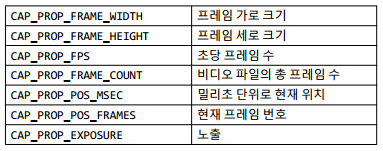

In [17]:
# 우선 열려있는 video를 닫고 다시 로딩하는 것이 메모리에 좋습니다.
video.release()
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

########### 함께 해보기 - 저장된 비디오의 정보 몇개만 확인해보기
# 영상의 가로, 세로, 총 프레임 수, FPS 정보로 가지고 옵니다.
video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)

video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)

video_fps = video.get(cv2.CAP_PROP_FPS)

print("가로 :", video_width)
print("세로 :", video_height)
print("총 프레임 수 :", video_length)
print("FPS :", video_fps)

#해당 비디오를 가지고 이용한 후에는 해당 비디오를 메모리에세 제거하기 위해 release함수를 호출합니다.
video.release()

가로 : 640.0
세로 : 360.0
총 프레임 수 : 667.0
FPS : 29.97002997002997


In [18]:
########### 함께 해보기 - 영상의 총시간 확인하고 프린트 해보기
# 총 영상의 길이는 FPS와 프레임수를 알면 됩니다. 전체영상시간(초) = 전체프레임수/(초당 프레임수), 전체가 600프레임이고, 60 FPS이면, 전체 시간은 10초

video_time = video_length / video_fps
video_time


22.255566666666667

---



## <font color="Blue">**3. 영상으로부터 이미지 데이터 추출하기**
* OpenCV 라이브러리를 활용해서 영상 파일("tutorial.mp4")을 불러온 후, 모든 프레임 또는 일부 프레임을 저장해봅니다.
   
    >* 파일경로 TUTORAL_PATH>image
    >* 총 몇개의 파일들이 저장되었는지 확인


### <font color="green">**[실습3]동영상에서 이미지 컷 하나만 가지고와서 저장해 보세요**

#### <font color="red">**[미션 3.1] 동영상에서 프레임 이미지 하나만 가지고 와 보세요.**
- **영상의 프레임 하나만 이미지로 가지고 오기** (**video.read()**활용)
- https://thinking-developer.tistory.com/61

In [19]:
########## 함께 해보기 - 코랩에서 이미지를 볼수 있는 라이브러리를 임포트 해보기
# 코랩에서는 cv2의 imshow가 안되기 때문에 다른 방법으로 진행해야 함
# https://overface.tistory.com/573

from google.colab.patches import cv2_imshow

비디오가 열려 있나요?:  True
1  번째 프레임을 읽었습니다.
프레임을 읽었는지요?:  True
읽은 프레임의 이미지데이터(numpy형태)는?  
 [[[157 140 127]
  [179 162 149]
  [136 119 106]
  ...
  [ 65 103 159]
  [ 72 107 158]
  [ 88 123 174]]

 [[158 141 128]
  [178 161 148]
  [140 123 110]
  ...
  [ 44  82 138]
  [ 48  83 134]
  [ 63  98 149]]

 [[162 145 132]
  [178 161 148]
  [146 129 116]
  ...
  [ 14  44  90]
  [ 15  39  76]
  [ 27  51  88]]

 ...

 [[182 172 167]
  [182 172 167]
  [182 172 167]
  ...
  [182 176 171]
  [181 175 170]
  [181 175 170]]

 [[182 172 167]
  [182 172 167]
  [182 172 167]
  ...
  [182 176 171]
  [181 175 170]
  [181 175 170]]

 [[182 172 167]
  [182 172 167]
  [182 172 167]
  ...
  [182 176 171]
  [181 175 170]
  [181 175 170]]]


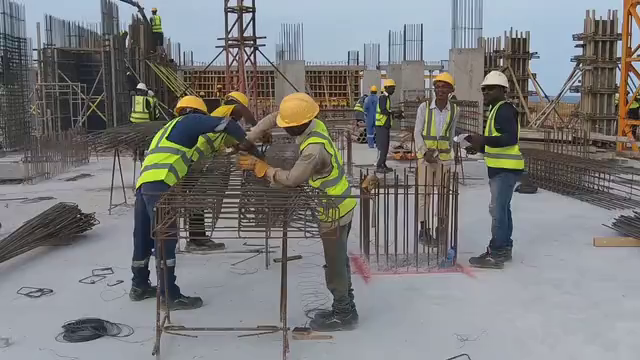

In [20]:
#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

#영상이 열려 있나 확인 하기
print("비디오가 열려 있나요?: ", video.isOpened())

# read를 통해 프레임을 하나씩 읽으면서 ret값은 프레임을 읽었는지 못 읽었는지 확인, True이면 제대로 읽은 것, 이미지는 frame에 저장
ret,frame = video.read()
print(int(video.get(cv2.CAP_PROP_POS_FRAMES)), " 번째 프레임을 읽었습니다.")
print("프레임을 읽었는지요?: ", ret)
print("읽은 프레임의 이미지데이터(numpy형태)는? ","\n", frame)

#이미지 보여주기, cv2.imshow는 로컬에서 진행. 코랩에서는 cv2_imshow 안됨
cv2_imshow(frame)

#비디오를 메모리에서 제거하기
video.release()


##### **[참조] 특정 번째 프레임을 추출하고 싶을때**

비디오가 열려 있나요?:  True
500  번째 프레임을 읽었습니다.


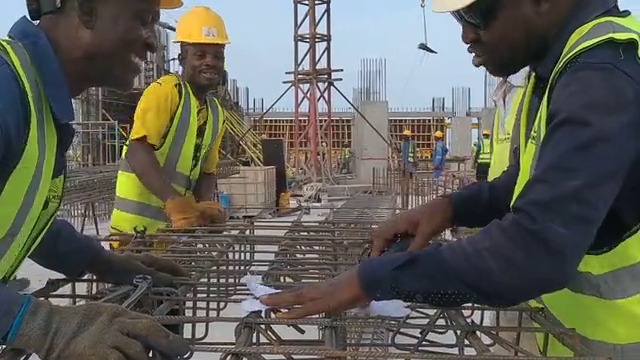

In [21]:
#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

#영상이 열려 있나 확인 하기
print("비디오가 열려 있나요?: ", video.isOpened())

################ 함께 해보기 - 500번째 프래임 그림을 가지고 오세요
# 특정번째 프레임을 가지고 오고 싶을땐때는 video.set(cv2.CAP_PROP_POS_FRAMES, 프레임-1) 를 활용한다.(0부터 시작)

video.set(cv2.CAP_PROP_POS_FRAMES, 499)

ret,frame = video.read()
print(int(video.get(cv2.CAP_PROP_POS_FRAMES)), " 번째 프레임을 읽었습니다.")

#이미지 보여주기, cv2.imshow는 로컬에서 가능, 코랩에서는 cv2_imshow로 진행
cv2_imshow(frame)

#비디오를 메모리에서 제거하기
video.release()

#### <font color="red">**[미션 3.2] 동영상에서 모든 프레임이미지를 helmet>image 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>


- **1단계:프레임수(=저장할 이미지수)를 확인하고 저장할 폴더를 지정합니다.**
 - 사전에 구글 드라이브 helmet 밑에 image라는 폴더를 만들어 주세요

In [23]:
import os

#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 helmet 폴더 밑에 image 폴더 생성해 두기
TUTORIAL_IMAGE = TUTORIAL_PATH +"/image"
if not os.path.exists(TUTORIAL_IMAGE):
      os.makedirs(TUTORIAL_IMAGE)

#저장할 image 폴더 여부와 비디오 오픈 여부 확인
print("이미지폴더 생성 여부:", os.path.exists(TUTORIAL_IMAGE))
print("영상 열려있는 여부:", video.isOpened())

#전체 영상 프레임 수 확인하기
print(video.get(cv2.CAP_PROP_FRAME_COUNT))

이미지폴더 생성 여부: True
영상 열려있는 여부: True
667.0


- **2단계:while(video.isOpened())를 활용해 하나씩 프레임을 읽으면서 저장합니다.**
 -
사이즈가 큰 경우 가져올때 image = cv2.resize(frame, (500,400))을 활용하여 용량을 줄여 저장합니다.

In [29]:
# 화면에 보여주는 imshow 호출
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

while(video.isOpened()):
  ret,frame = video.read()

  # 비디오를 계속 한 프레임씩 열면서 화면에 뿌린다. 더이상 변환할 프레임이미지가 없으면 오픈된 비디오에서 프레임읽는 것을 빠져나온다.

  ################# 함께 해보기 - cv2.resize를 통해 프레임을 줄여줍니다.
  # 화면에 보여 주기 위해 이미지 사이즈는 줄여서 진행 500x400으로 변경 ㅡ frame를 가지고 와서 사이즈 줄여서 image 에 저장
  image = cv2.resize(frame, (500, 400))

  # 이미지 보여주기, 프레임이 많으면 다운될 수 있어서 해당 코드는 주석 처리하는 것을 권장함
  # cv2_imshow(image)

  ################## 함께 해보기 - 이미지 폴더에 현재프레임번호로 저장한 것을 저장 여부를 프린트 함
  # 이미지 폴더에 프레임번호.jpg로 저장하고 저장되었다는 것을 보여주기
  cv2.imwrite(TUTORIAL_IMAGE+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image)
  print(f"{str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))}.jpg saved")

  ################## 함께 해보기 - 현재 프레임이 전체 프레임수와 동일하면 끝냄.  cv2.CAP_PROP_POS_FRAMES, cv2.CAP_PROP_FRAME_COUNT 활용
  # 현재의 프레임 위치가 마지막 위치이면 While를 빠져나옴
  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
    break

#비디오를 메모리에서 제거하기
video.release()

1.jpg saved
2.jpg saved
3.jpg saved
4.jpg saved
5.jpg saved
6.jpg saved
7.jpg saved
8.jpg saved
9.jpg saved
10.jpg saved
11.jpg saved
12.jpg saved
13.jpg saved
14.jpg saved
15.jpg saved
16.jpg saved
17.jpg saved
18.jpg saved
19.jpg saved
20.jpg saved
21.jpg saved
22.jpg saved
23.jpg saved
24.jpg saved
25.jpg saved
26.jpg saved
27.jpg saved
28.jpg saved
29.jpg saved
30.jpg saved
31.jpg saved
32.jpg saved
33.jpg saved
34.jpg saved
35.jpg saved
36.jpg saved
37.jpg saved
38.jpg saved
39.jpg saved
40.jpg saved
41.jpg saved
42.jpg saved
43.jpg saved
44.jpg saved
45.jpg saved
46.jpg saved
47.jpg saved
48.jpg saved
49.jpg saved
50.jpg saved
51.jpg saved
52.jpg saved
53.jpg saved
54.jpg saved
55.jpg saved
56.jpg saved
57.jpg saved
58.jpg saved
59.jpg saved
60.jpg saved
61.jpg saved
62.jpg saved
63.jpg saved
64.jpg saved
65.jpg saved
66.jpg saved
67.jpg saved
68.jpg saved
69.jpg saved
70.jpg saved
71.jpg saved
72.jpg saved
73.jpg saved
74.jpg saved
75.jpg saved
76.jpg saved
77.jpg saved
78.jpg s

In [30]:
# 추출된 이미지 수 확인하기
import os
file_list = os.listdir(TUTORIAL_IMAGE)
print(len(file_list))

667


#### <font color="red">**[미션 3.3] 동영상에서 일부 프레임이미지를 다른 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>

- (1번) 프레임번호가 200 부터 300 까지 값만 가지고 저장해 보세요 (helmet>image200 이라는 폴더에)
- (2번) 50개째 프레임만 저장해보세요. (50, 100, 150... 번째 프레임을  helmet>image50 폴더에)

##### **(1번)프레임번호가 200~300까지 이미지 저장하기(helmet>image200)**

In [31]:
# 특정 프레임 에서 플레이 하는 방법은 video.set(cv2.CAP_CAP_PROP_POS_FRAMES, 프레임) 활용 가능함
from google.colab.patches import cv2_imshow
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 helmet 폴더 밑에 image200 폴더 생성해 두기
TUTORIAL_IMAGE200 = TUTORIAL_PATH +"/image200"
if not os.path.exists(TUTORIAL_IMAGE200):
      os.makedirs(TUTORIAL_IMAGE200)

################ 함께 해보기 - video.set과 cv2.CAP_PROP_POS_FRAMES를 활용하여 시작 프레임을 세팅 (imgage200이라는 폴더 생성해 두기)
# set 함수를 활용해 200프레임 이후의 video만 읽어오세요(cv2.CAP_PROP_POS_FRAMES	현재 프레임을 나타나는 함수도 함께 활용)
video.set(cv2.CAP_PROP_POS_FRAMES, 199)

# 세팅된 프레임부터 300 까지 비디오를 열면서 이미지 저장하기
while(video.isOpened()):
  ret,frame = video.read()
  if ret and video.get(cv2.CAP_PROP_POS_FRAMES) <= 300:
    cv2.imwrite(TUTORIAL_IMAGE200+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
    print(str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg saved")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

video.release()

200.jpg saved
201.jpg saved
202.jpg saved
203.jpg saved
204.jpg saved
205.jpg saved
206.jpg saved
207.jpg saved
208.jpg saved
209.jpg saved
210.jpg saved
211.jpg saved
212.jpg saved
213.jpg saved
214.jpg saved
215.jpg saved
216.jpg saved
217.jpg saved
218.jpg saved
219.jpg saved
220.jpg saved
221.jpg saved
222.jpg saved
223.jpg saved
224.jpg saved
225.jpg saved
226.jpg saved
227.jpg saved
228.jpg saved
229.jpg saved
230.jpg saved
231.jpg saved
232.jpg saved
233.jpg saved
234.jpg saved
235.jpg saved
236.jpg saved
237.jpg saved
238.jpg saved
239.jpg saved
240.jpg saved
241.jpg saved
242.jpg saved
243.jpg saved
244.jpg saved
245.jpg saved
246.jpg saved
247.jpg saved
248.jpg saved
249.jpg saved
250.jpg saved
251.jpg saved
252.jpg saved
253.jpg saved
254.jpg saved
255.jpg saved
256.jpg saved
257.jpg saved
258.jpg saved
259.jpg saved
260.jpg saved
261.jpg saved
262.jpg saved
263.jpg saved
264.jpg saved
265.jpg saved
266.jpg saved
267.jpg saved
268.jpg saved
269.jpg saved
270.jpg saved
271.jp

##### **(2번)프레임번호가 50, 100, 150 ... 이미지 저장하기(helmet>image50)**

In [49]:
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

#프레임 이미지저장할 위치 지정하기, 사전에 helmet 폴더 밑에 image50 폴더 생성해 두기
TUTORIAL_IMAGE50 = TUTORIAL_PATH +"/image50"
if not os.path.exists(TUTORIAL_IMAGE50):
      os.makedirs(TUTORIAL_IMAGE50)

while(video.isOpened()):
  ret,frame = video.read()

  ####################### 함께 해보기 - if안에 50으로 나눠서 0일 경우 마다 저장하기 ( 사전에 image50 이라는 폴더 생성해 두기)
  # 현재의 프레임이 50, 100, 150, 200등 50 단위일때마다 화면에 뿌리고 image50에 저장하기
  if(video.get(cv2.CAP_PROP_POS_FRAMES) % 50 == 0):
      cv2_imshow(frame)
      cv2.imwrite(TUTORIAL_IMAGE50 +"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
      print(str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg saved")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

video.release()

Output hidden; open in https://colab.research.google.com to view.

---

## <font color="Blue">**4. 확보한 이미지 데이터 한눈에 확인하기**
* 이미지 파일의 이름과 경로 데이터를 확보한 후에 앞의 20개 데이터, 또는 뒤의 20개 데이터를 확인합니다.
   
    >* glob를 통해 파일 패스 저장하기
    >* imshow와 subplot를 통해 그림들을 리스트업하기

#### <font color="green">**[실습 4] "image" 폴더내의 이미지들을 img_list에 저장하고, 앞의 20개만 샘플로 img_list_front20, 뒤에서 20개만 샘플로 img_list_back20에 저장합니다**

In [40]:
# 이미지 리스트를 우선 가지고 옴
import glob

# glob는 특정 파일의 전체 Path를 가지고 와서 리스트로 저장함
img_list = glob.glob(TUTORIAL_PATH + "/image/*.jpg")

print("전체 이미지수: ",len(img_list))
print("샘플 패스 확인: ",img_list[0])


전체 이미지수:  667
샘플 패스 확인:  /content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/1.jpg


In [41]:
# 이미지 리스트의 20개만 가지고 옴

img_list_front20 = img_list[0:20]
img_list_back20 =  img_list[-20:]

In [42]:
img_list_back20

['/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/648.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/649.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/650.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/651.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/652.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/653.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/654.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/655.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/656.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/657.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/658.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/659.jpg',
 '/content/drive

<font color="red">**[미션 4.1]img_list_back20에 저장된 20개의 이미지를 노트북 화면에 매트릭스 형태로 볼수 있게 해 주세요**</font>
- rows = 4 행, Columns = 5열로 해서 보여 주세요
- https://foss4g.tistory.com/1263 를 참조해 주세요

In [43]:
img_list_back20

['/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/648.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/649.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/650.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/651.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/652.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/653.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/654.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/655.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/656.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/657.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/658.jpg',
 '/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/659.jpg',
 '/content/drive

In [44]:
import matplotlib.pyplot as plt

# figure의 사이즈를 정의하고 몇 바이 몇 행렬에 그림들을 뿌릴 것인지 결정 (본 자료는 20개 이므로 4*5임)
fig = plt.figure(figsize=(20, 15))
rows = 4
cols = 5
i= 1

for filename in img_list_front20:
  #이미지 파일들을 하나씩 읽어서 img2에 넣고
  img2 = cv2.imread(filename)

  #4X5 매트릭스 플롯에 하나씩 넣어 보이기
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()


Output hidden; open in https://colab.research.google.com to view.

###### **그림 하단에 파일명을 넣고 싶다면 어떻게 해야 할까?**

In [46]:
import matplotlib.pyplot as plt

# figure의 사이즈를 정의하고 몇 바이 몇 행렬에 그림들을 뿌릴 것인지 결정 (본 자료는 20개 이므로 4*5임)
fig = plt.figure(figsize=(20, 15))
rows = 4
cols = 5
i= 1

for filename in img_list_front20:
  #이미지 파일들을 하나씩 읽어서 img2에 넣고
  img2 = cv2.imread(filename)

  #4X5 매트릭스 플롯에 하나씩 넣어 보이기
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  ########## 함께 해보기 - 파일리스트에서 파일명만 가지고 오기 참고로 img_list_front20 = /content/drive/MyDrive/helmet/image/1.jpg 게 저장되어 있음
  #그림 하단에 파일명 추가, 마지막 문자열 값을 추출은 (img_list_front20[0].split('/')은 "/"로 구분후 마지막문자열임)

  xlabel = filename.split('/')[-1]

  ax.set_xlabel(xlabel)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [47]:
img_list_front20[0]

'/content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image/1.jpg'

#### <font color="green">**[실습 5] 앞의 실습 4의 내용을 그대로 활용하여 "image50" 폴더내의 이미지들을 img_list에 저장하고, 화면에 뿌려 봐주세요**

In [50]:
# 이미지 리스트 가져오기
img50_list = glob.glob(TUTORIAL_PATH + "/image50/*.jpg")

print("전체 이미지수: ",len(img50_list))
print("샘플 패스 확인: ",img50_list[0])

전체 이미지수:  13
샘플 패스 확인:  /content/drive/MyDrive/Deep_Learning_KT/project/sample/tutorial/image50/50.jpg


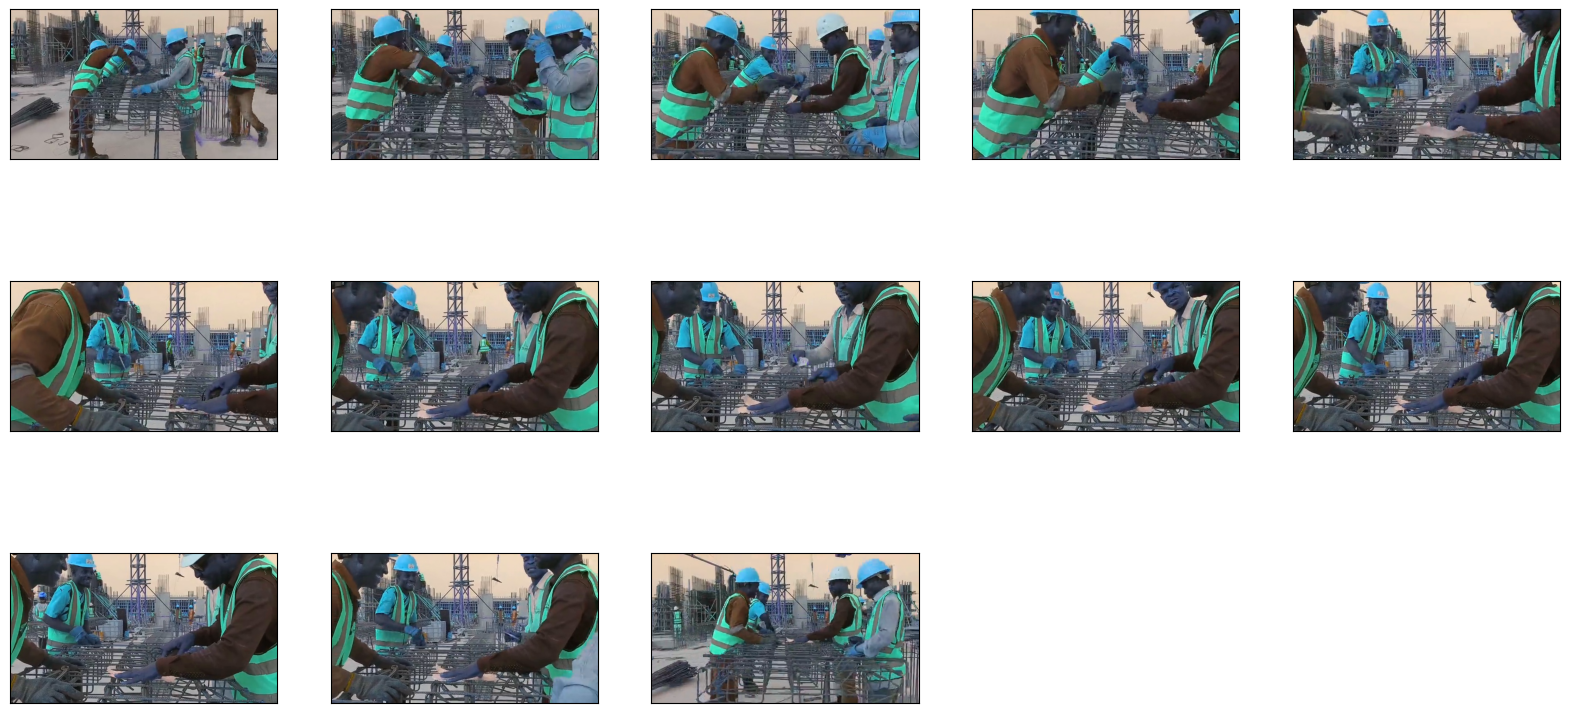

In [52]:
#  화면에 뿌리기
fig = plt.figure(figsize=(20, 10))
rows = 3
cols = 5
i= 1

for filename in img50_list:

  img2 = cv2.imread(filename)

  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()

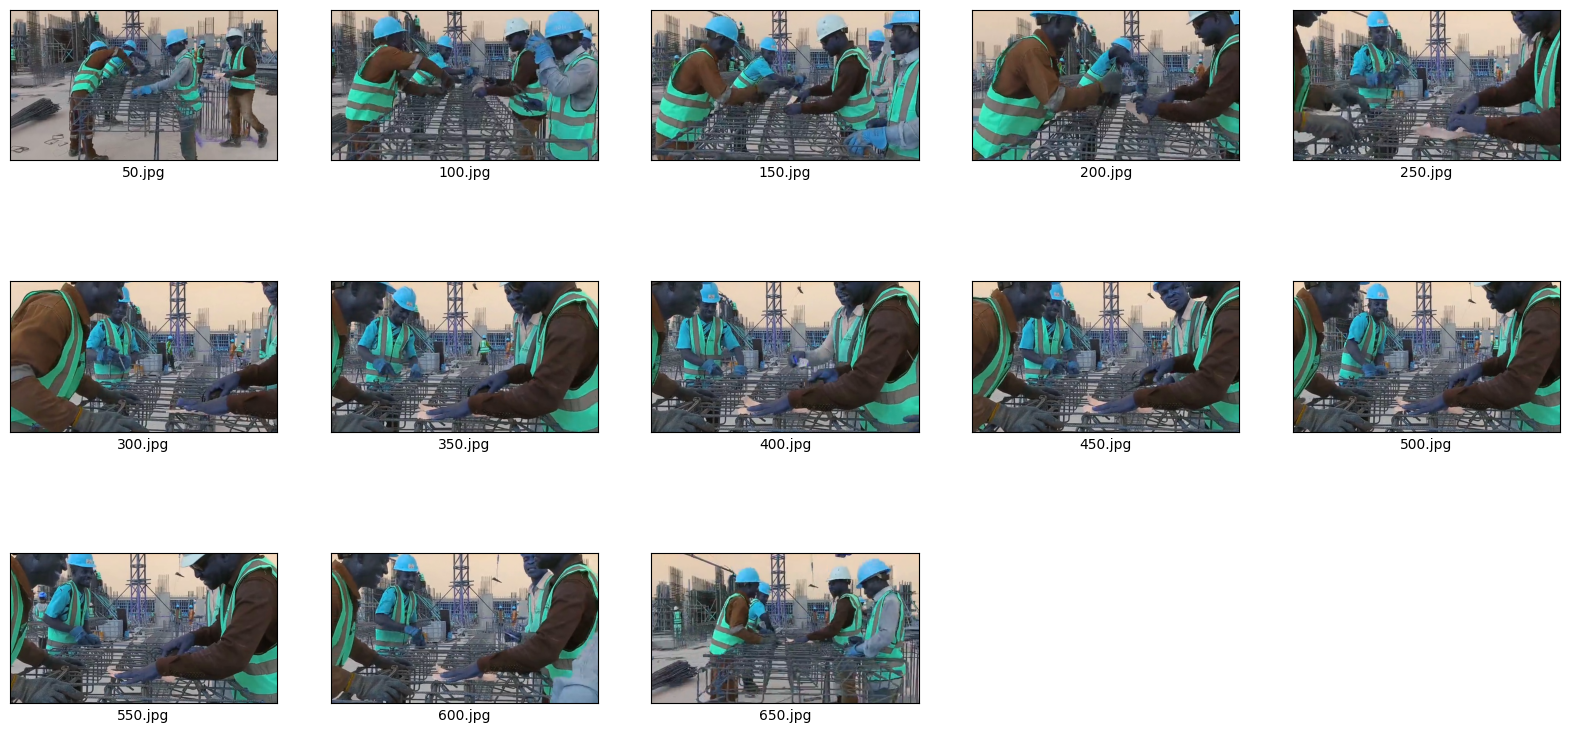

In [53]:
# 화면에 파일 이름 포함해서 뿌리기
fig = plt.figure(figsize=(20, 10))
rows = 3
cols = 5
i= 1

for filename in img50_list:

  img2 = cv2.imread(filename)

  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  xlabel = filename.split('/')[-1]

  ax.set_xlabel(xlabel)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()